<a href="https://colab.research.google.com/github/ManmeetBanerjee/AirBnb-NYC-2019-Booking-Analysis/blob/main/AirB%26b_Booking_Analysis_Submission_(Manmeet_Prague)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AirB&b Booking Analysis**

by Manmeet Banerjee (Prague)



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Github Commits**  - https://github.com/ManmeetBanerjee/AirB-b-Booking-Analysis.git

# **Project Summary and Understanding :**



The Airbnb NYC 2019 dataset provides a comprehensive collection of information regarding Airbnb listings in New York City for the year 2019. This dataset encompasses various attributes such as listing details, host information, neighborhood characteristics, pricing, availability, and customer reviews. The primary objective of analyzing this dataset is to gain insights into the dynamics of the Airbnb rental market in New York City.

However, to provide a detailed understanding of the dataset and specify the goals of the analysis, we need to delve deeper into the dataset's structure, contents, and potential areas of exploration. This involves examining the different variables present in the dataset, understanding their significance, and identifying potential avenues for analysis.

The goals of the analysis includes:

* Understanding Market Trends: Explore trends in Airbnb listings, such as pricing variations, popularity of different property types, and seasonal demand fluctuations.

* Identifying Key Factors: Determine factors influencing listing prices, occupancy rates, and customer satisfaction.

* Neighborhood Analysis: Investigate the distribution of listings across neighborhoods, assess neighborhood characteristics, and identify high-demand areas.

* Host Performance: Evaluate host performance metrics such as response rates, review scores, and listing activity.

* Customer Preferences: Analyze customer reviews and ratings to understand preferences, identify areas for improvement, and enhance customer experience.

* Business Insights: Provide actionable insights for Airbnb hosts, property investors, and policymakers to optimize rental strategies, improve profitability, and enhance the overall Airbnb ecosystem in New York City.

To proceed with the analysis effectively, it's essential to define clear objectives, establish hypotheses to test, and leverage appropriate analytical techniques and visualization tools. By gaining a detailed understanding of the dataset and aligning our analysis goals with the broader objectives of the project, we can derive valuable insights that contribute to informed decision-making and strategic planning within the Airbnb rental market in New York City.

# **Data Loading:**


We will begin by loading the dataset from the google drive, which in this case is a CSV file. We'll utilize Python's pandas library to load the data into a DataFrame, allowing us to manipulate and analyze the dataset efficiently.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File path in Google Drive
file_path = "/content/drive/My Drive/Airbnb NYC 2019.csv"

# Read CSV file into DataFrame
df = pd.read_csv(file_path)

# **Exploratory Data Anylysis and Data Cleaning**




Once the dataset is loaded, we'll conduct exploratory data analysis to explore various aspects of the data.

This includes:

* Examining the first few rows of the dataset (head) to understand its structure and contents.

* Reviewing the last few rows of the dataset (tail) to ensure data completeness.

* Summarizing key statistics such as mean, median, standard deviation, etc., to understand the distribution of numerical variables.

* Creating a data dictionary to document the meaning and type of each variable in the dataset.

* Visualizing the data using histograms, box plots, scatter plots, and other techniques to identify patterns, outliers, and relationships between variables.

By performing comprehensive data exploration, we aim to gain insights into the dataset's characteristics, identify potential data quality issues, and lay the foundation for subsequent data cleaning and analysis tasks.

In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Display the first few rows of the dataset (head)
print("First few rows of the dataset:")
print(df.head())

# Display the last few rows of the dataset (tail)
print("\nLast few rows of the dataset:")
print(df.tail())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Create a data dictionary
data_dict = {}
for column in df.columns:
    data_dict[column] = df[column].dtype

# Display the data dictionary
print("\nData Dictionary:")
for key, value in data_dict.items():
    print(f"{key}: {value}")



In [ ]:
df.head()

#**Handel Missing Values :**

Missing values were observed in several columns of the dataset. For the 'name' and 'host_name' columns, missing values were handled by filling them with the placeholder value 'Unknown', as these are categorical variables and it's reasonable to assume that missing names can be represented as 'Unknown'.

In [ ]:

# Impute missing values for 'name' and 'host_name' with placeholder value 'Unknown'
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

For the 'last_review' column, which represents the date of the last review, and the 'reviews_per_month' column, indicating the average number of reviews per month, it was observed that a 10052 out of 48895 entries were missing. Since there might be various reasons for missingness in these columns and imputing them with a meaningful value might introduce bias, missing values were filled NaN.

In [ ]:
# For 'last_review' and 'reviews_per_month', fill missing values with NaN
df['last_review'].fillna(np.nan, inplace=True)
df['reviews_per_month'].fillna(np.nan, inplace=True)

# Validate data integrity
# Check if any missing values remain after handling
remaining_missing_values = df.isnull().sum().sum()
if remaining_missing_values == 0:
    print("\nAll missing values have been handled successfully.")
else:
    print(f"\nThere are {remaining_missing_values} missing values remaining after handling.")

Missing values were filled with NaN to maintain data integrity and avoid potential bias in subsequent analysis.That's why it shows 20141 missing values


In [ ]:
# Save the DataFrame to a CSV file
output_file_path = "/content/drive/My Drive/cleaned_airbnb_data.csv"
df.to_csv(output_file_path, index=False)

# **Check Data is Normally Distributed :**

To check if the data is normally distributed and resembles a bell curve, using visualizations  histograms.

In [ ]:
# Plot histogram and KDE plot for a numeric column (e.g., 'price')
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



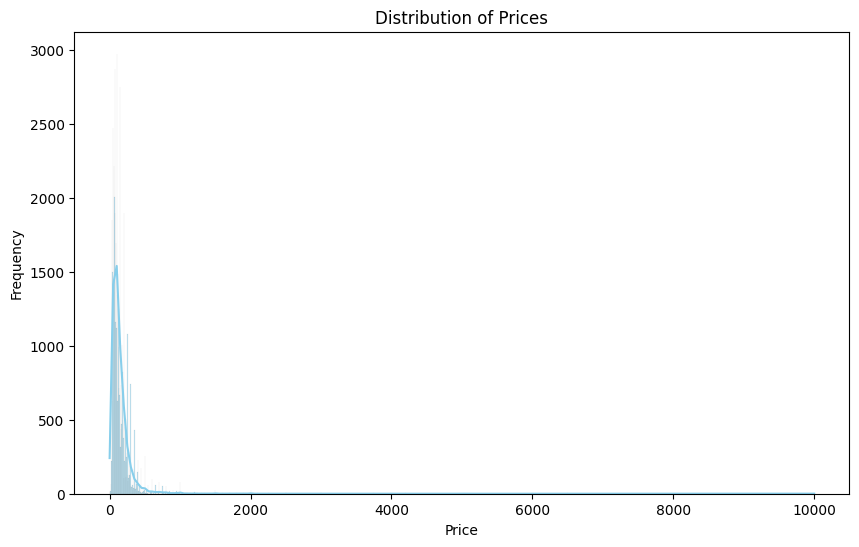

Analysis of  variables such as prices, frequency exhibit skewed distributions might be  due to factors such as seasonality, location-specific demand, and varying property characteristics.


# **Check for Outliers :**

Generating  box plots for each numerical column, allowes to visually inspect for outliers.Keeping  in mind that outlier detection is context-dependent, and what constitutes an outlier may vary based on the specific characteristics of data and the goals of analysis. Therefore, it's essential to interpret the results of outlier detection in the context of analysis objectives and domain expertise.

In [ ]:
# Select numerical columns for outlier detection
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Plot box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

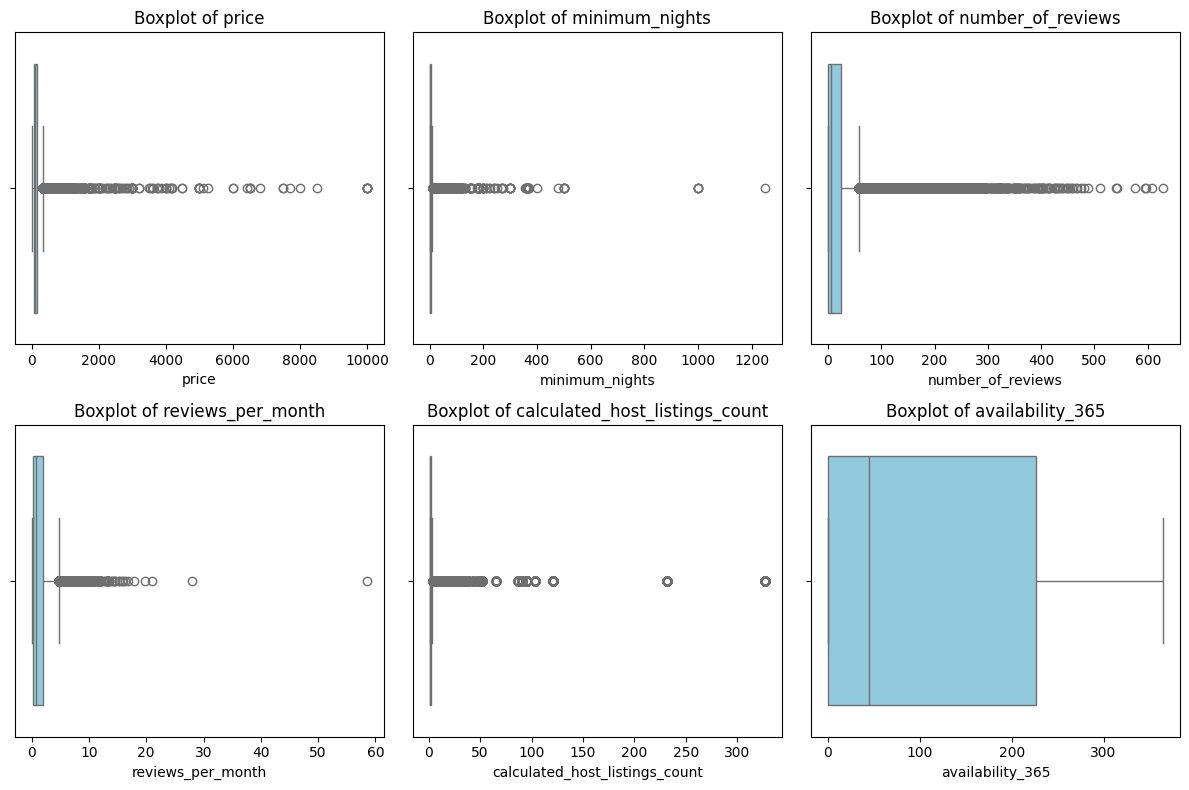

Based on the box plots

Price: The majority of Airbnb listings are priced between 0 to around 2000 , as indicated by the box. There are numerous outliers beyond this range up to 10000 units; these could be luxury listings or errors in data entry.


Minimum Nights: Most listings require a short stay, as seen from the compact box near zero. Outliers indicate some listings requiring an unusually high minimum number of nights, which might be due to specific host preferences or errors.


Number of Reviews: A significant number of listings have received up to around 50 reviews. Outliers with higher numbers suggest popular spots but could also indicate older listings that have accumulated more feedback over time.

Reviews per Month: Most properties receive a few reviews per month; outliers may represent highly popular or strategic locations attracting more guests.
Calculated Host Listings Count: The majority hosts have few properties listed; outliers might be professional hosts or property management companies with many listings.

Availability 365: This plot shows a bimodal distribution indicating that many properties are either available for most days in a year or very few days. It suggests two distinct types of hosts – those who list their property frequently and those who do it occasionally.

These outliers provide valuable insights into the data and can help in understanding the trends and making better decisions. However, they could also be due to errors or extreme cases and might need to be handled appropriately during data preprocessing for any data-driven model development.

#**$Analysis & Visualization$**



1. *Market Share of different Price Range :*   

To visualize the market share of different price ranges using a pie chart, we need to first categorize the prices into different ranges and then calculate the frequency or count of listings within each range.

In [ ]:
# Define price ranges
price_ranges = {
    '0-50': df[(df['price'] >= 0) & (df['price'] <= 50)].shape[0],
    '51-100': df[(df['price'] > 50) & (df['price'] <= 100)].shape[0],
    '101-150': df[(df['price'] > 100) & (df['price'] <= 150)].shape[0],
    '151-200': df[(df['price'] > 150) & (df['price'] <= 200)].shape[0],
    '201+': df[df['price'] > 200].shape[0]
}

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(price_ranges.values(), labels=price_ranges.keys(), autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'], startangle=140)
plt.title('Market Share of Different Price Ranges')
plt.show()


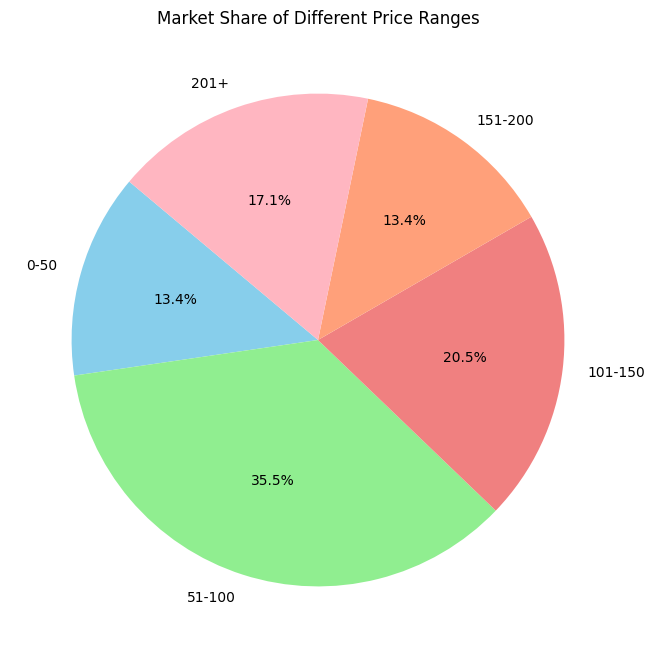

> ***Market Share Analysis of Different Price Ranges***

  The analysis provides insights into the distribution of Airbnb listings across various price ranges. Here's a breakdown of the market share for each price range:


*  **0-50:**  -- Approximately **13.4%** -- Budget Conscious , Affordable Accommodations Travelers

*   **51-100:** -- **Largest segment** **31.5%** -- Listings in this range are moderately priced and appeal to a wide range of travelers, including budget-conscious individuals and those willing to pay slightly more for added amenities or convenience.


*  **101-150: -- 20.5%**.  Typically offer more amenities, comfort, and possibly better locations compared to lower-priced options.
*   **151-200:** Accounting for **13.4%** of the market, this price range caters to travelers seeking higher-end accommodations with premium features.


*  **200+:** Representing **17.1%** of the market, this price range encompasses the highest-priced listings available. These accommodations often provide luxury amenities, exclusive locations, or exceptional experiences tailored to discerning travelers willing to pay a premium for top-tier accommodations.


Analysis and Implications:


1.  Price Sensitivity:  51-100 price range, indicating a high level of price sensitivity among Airbnb users. Hosts should consider pricing strategies carefully to remain competitive within this segment.

2. Market Segmentation: The diverse distribution across various price ranges reflects the segmented nature of the Airbnb market, catering to travelers with varying budgets, preferences, and expectations. Hosts can leverage this segmentation to tailor their offerings and target specific traveler segments effectively.

3. Demand Dynamics: The distribution of listings across different price ranges provides insights into demand dynamics within the Airbnb market. Understanding which price ranges attract the most significant share of listings can help hosts optimize their pricing strategies to maximize occupancy and revenue.

4. Competitive Landscape: The analysis sheds light on the competitive landscape within each price range. Hosts operating within specific price segments should assess market trends, competitor offerings, and traveler preferences to position themselves effectively and attract bookings.

5. Opportunities for Growth: Hosts and investors can identify opportunities for growth and expansion by analyzing market share trends across different price ranges. Exploring underserved or emerging segments of the market can uncover new opportunities for property investments or niche market positioning.

In conclusion, the analysis of market share across different price ranges provides valuable insights for hosts, investors, and stakeholders in the Airbnb ecosystem. By understanding the distribution of listings and the dynamics within each price segment, stakeholders can make informed decisions to optimize their offerings, attract guests, and drive business growth.








2. *Distribution of listings across both room types and neighborhoods :*

To Visualize the distribution of listings across neighborhoods by room type , creating a stacked bar chart using Seaborn's countplot with the hue parameter set to 'room_type'.

In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Define a bright palette
bright_palette = sns.color_palette("husl", 3)

# Plot the stacked bar chart with the bright palette
sns.countplot(x='neighbourhood_group', hue='room_type', data=df, palette=bright_palette)

# Add labels and title
plt.title('Distribution of Listings Across Neighborhoods by Room Type')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove the legend title
plt.legend(title='Room Type')

# Show plot
plt.show()


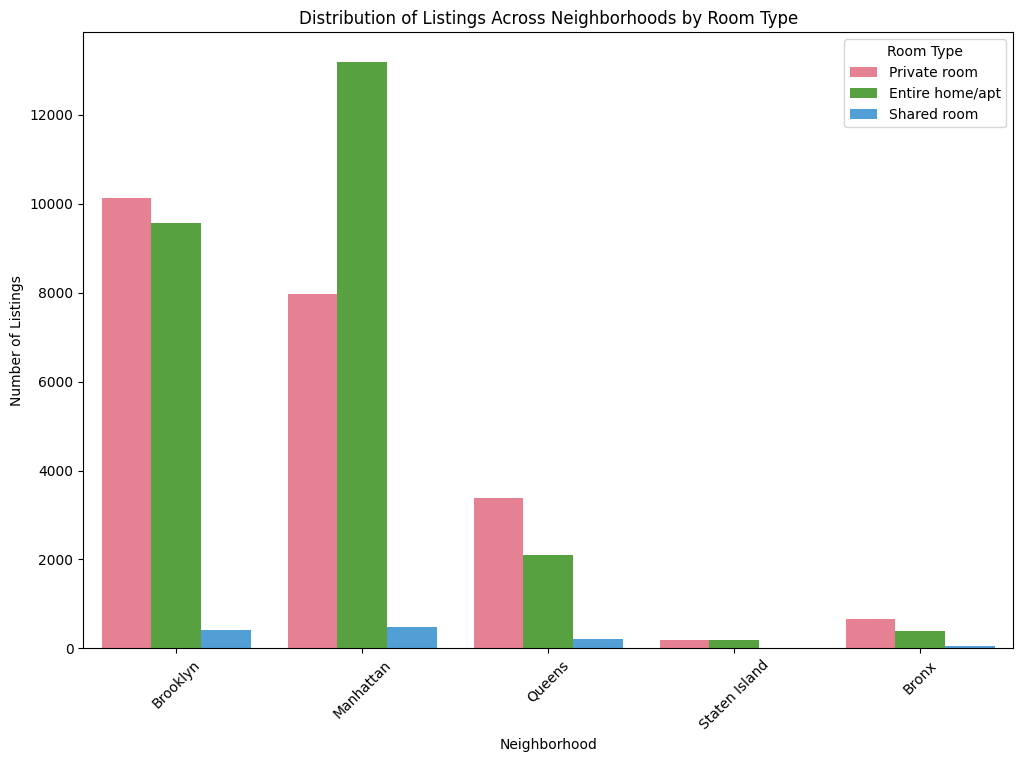


> ***Analysis of Distribution of listings across neighborhoods by room type***

  The analysis provides insights into the distribution of listings across neighborhoods by room type:


* Manhattan: Manhattan exhibits a higher number of entire homes/apartments compared to private rooms. This could be due to the high demand for complete spaces in this bustling borough. Like Brooklyn, shared rooms are also minimal here, suggesting that they are less popular among hosts and guests.

* Brooklyn: This neighborhood has a balanced distribution of private rooms and entire homes/apartments listed on Airbnb. The number of shared rooms is significantly lower, indicating that hosts in Brooklyn prefer to list entire spaces or private rooms.

* Queens: In Queens, there are more private rooms than entire homes/apartments. This could be due to the residential nature of this borough, where hosts might prefer to rent out spare rooms. The proportion of shared rooms is even smaller, following the trend observed in the other neighborhoods.

* Staten Island: Staten Island has fewer listings overall but follows a similar pattern as Queens with more private rooms followed by entire homes/apartments. The number of shared rooms is very low, indicating that they are not a popular choice in this borough.

* Bronx: The Bronx also follows this pattern but has the least number of listings among all neighborhoods. This could be due to various factors such as demand, property availability, or local regulations.

In summary, the distribution of Airbnb listings across these neighborhoods shows that entire homes/apartments and private rooms are the most popular room types, while shared rooms are less common. Each neighborhood has its unique characteristics, which are reflected in the types of listings available. This analysis provides valuable insights for both hosts and guests using Airbnb in New York City.

3. *Correlation analysis using Correlation heatmap :*

A correlation heatmap is a graphical representation of the correlation matrix, which is a table showing correlation coefficients between many variables. Each cell in the table shows the correlation between two variables. In this datast there's an issue with generating the correlation heatmap due to the presence of non-numeric columns in the DataFrame. Correlation can only be calculated between numerical variables, so we have exclude non-numeric columns from the correlation analysis. This makes it easier to understand complex data and to find patterns quickly.



In [ ]:
# Select numerical columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

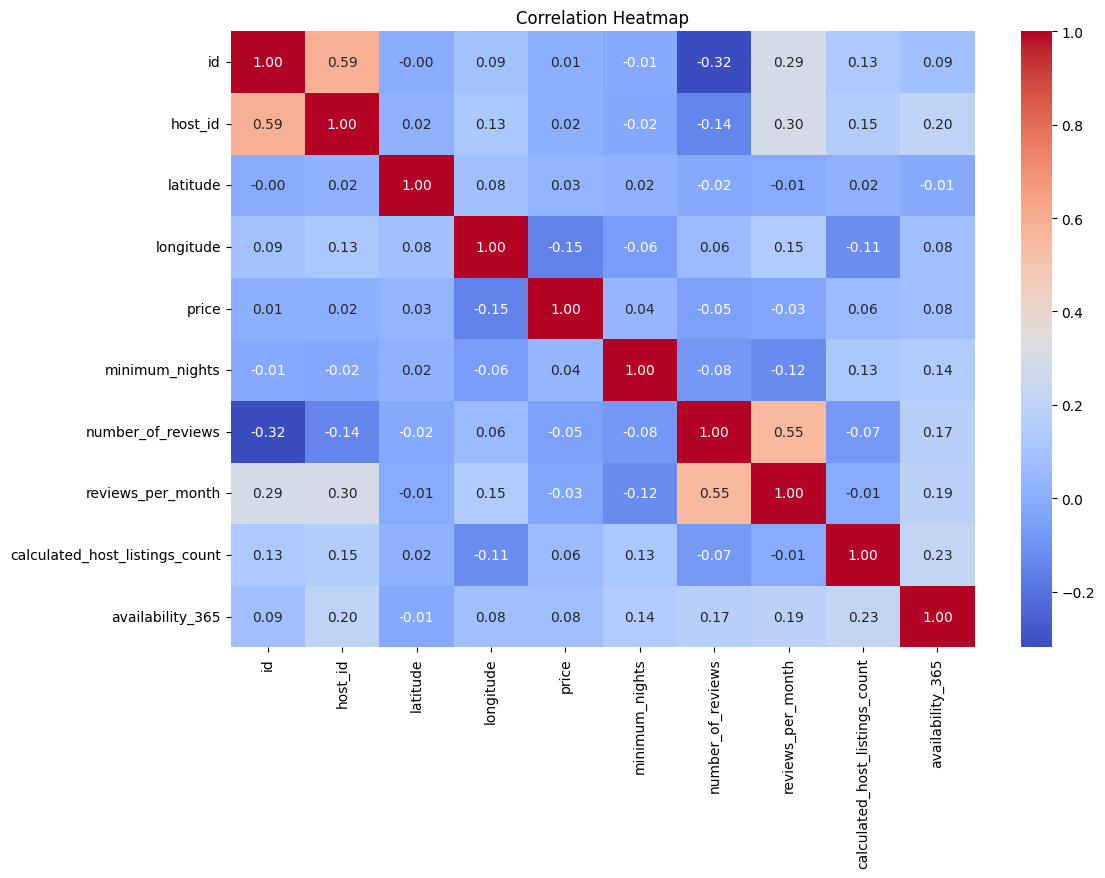

> ***Analysis of Correlation Heatmap***

In the context of the Airbnb dataset, the correlation heatmap helps us understand the relationship between different variables. Here’s an analysis based on the heatmap:

* ‘id’ and ‘host_id’: A positive correlation of 0.59 suggests that listings from hosts with higher IDs tend to have higher listing IDs. This could be because newer hosts (with higher IDs) would create newer listings (also with higher IDs).

* ‘latitude’ and ‘longitude’: These have low correlations with most other variables, indicating that the geographical location of the listings (as represented by these coordinates) does not have much linear relationship with other numerical features in the dataset.

* ‘number_of_reviews’ and ‘reviews_per_month’: A moderate positive correlation of 0.55 suggests that listings with more reviews tend to have more reviews per month. This could indicate popular listings that consistently receive reviews.

* ‘price’ and ‘minimum_nights’: A negative correlation of -0.15 indicates that listings requiring fewer minimum nights tend to be priced higher. This could be because listings with fewer minimum nights might be in higher demand, allowing for higher prices.

This heatmap is instrumental in understanding how different factors relate to each other within the Airbnb dataset. It can guide further analysis or model building by highlighting significant relationships. For example, if we were to predict the price of a listing, knowing that it has a negative correlation with minimum nights could be very useful. Similarly, understanding that the number of reviews and reviews per month are positively correlated could help in designing a review system or understanding user behavior.

Please note that correlation does not imply causation, and further investigation would be needed to draw definitive conclusions. Also, this analysis is based on the assumption that the data is accurate and reliable. Any inaccuracies in the data could affect the results of the analysis.


4. *Comparison between Price vs Number of Reviews :*

The scatter plot is used to compare the price and the number of reviews of listings in the Airbnb dataset. The reason for using a scatter plot for this comparison is that it allows us to see patterns in the data. Each point on the plot represents a listing, with its position on the horizontal axis showing its price and its position on the vertical axis showing the number of reviews it has received. This makes it easy to see at a glance how these two variables relate to each other for the different listings.

In [ ]:
# Scatter Plot: Price vs. Number of Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.5)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

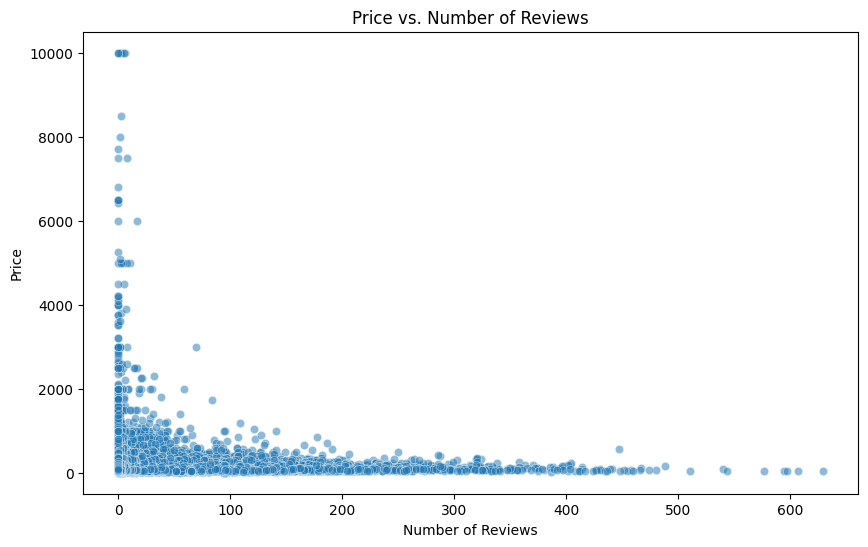

> ***Analysis of Price VS Number of Reviews***

From the scatter plot, we can make several observations:

* Concentration of listings: There is a high concentration of listings with lower prices and a varying number of reviews. This suggests that more affordable listings tend to receive more reviews.

* Outliers: There are a few listings with very high prices and a low number of reviews. These could be luxury listings or listings in high-demand locations that are rented less frequently due to their price.

* Trend: As the price increases, the number of reviews decreases. This could indicate that guests are less likely to review more expensive listings, or it could suggest that more expensive listings are rented less frequently.

* Correlation: There doesn’t appear to be a strong correlation between price and the number of reviews. This suggests that other factors may be more influential in determining the number of reviews a listing receives.

In conclusion, the scatter plot provides a useful way to visualize and understand the relationship between the price of a listing and the number of reviews it has received in the Airbnb dataset. It helps identify trends and patterns in the data, which can be useful for hosts when setting prices or for guests when choosing a place to stay. However, it’s important to remember that correlation does not imply causation, and further analysis would be needed to draw definitive conclusions

5. *Average Reviews per Month by Neighbourhood Group :*

The bar chart is used to compare the average reviews per month by neighbourhood group in the Airbnb dataset.The reason for using a bar chart for this comparison is that it allows us to see the differences between categories clearly. Each bar represents a different neighbourhood group, with its height indicating the average reviews per month. This makes it easy to compare the average reviews across different neighbourhood groups.

In [ ]:
# Bar Plot: Average Reviews per Month by Neighbourhood Group
plt.figure(figsize=(12, 6))
avg_reviews_neighbourhood = df.groupby('neighbourhood_group')['reviews_per_month'].mean().sort_values(ascending=False)
sns.barplot(x=avg_reviews_neighbourhood.index, y=avg_reviews_neighbourhood.values, palette='viridis')
plt.title('Average Reviews per Month by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Reviews per Month')
plt.xticks(rotation=45)
plt.show()

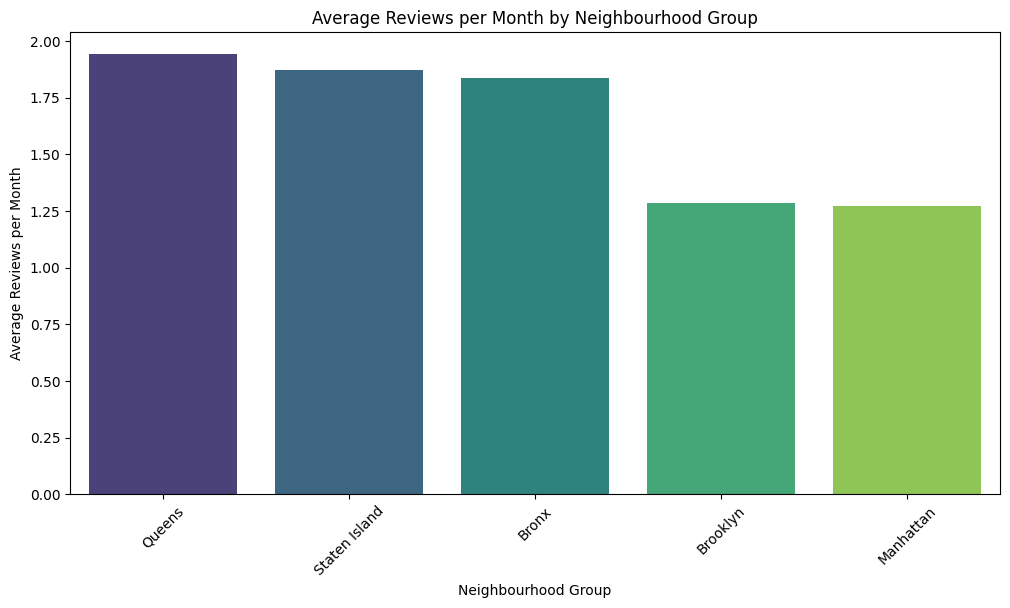

> ***Analysis of Price VS Number of Reviews***

From the bar chart, we can make several observations:

* Queens: Queens has the highest average reviews per month, indicating that listings in Queens tend to receive more feedback on average each month.

* Staten Island and Bronx: Staten Island and Bronx have similar average reviews per month, suggesting that listings in these neighbourhood groups receive a similar amount of feedback on average.

* Brooklyn: Brooklyn has fewer average reviews per month compared to Queens, Staten Island, and Bronx, indicating that listings in Brooklyn may receive less feedback on average.

* Manhattan: Manhattan has the least average reviews per month, suggesting that listings in Manhattan receive the least feedback on average.

In conclusion, the bar chart provides a useful way to visualize and understand the average reviews per month by neighbourhood group in the Airbnb dataset. It helps identify trends and patterns in the data, which can be useful for hosts when managing their listings or for guests when choosing a place to stay. However, it’s important to remember that these are average values and individual listings may vary.

#**Final Summary and Conclusion:**



The analysis of the Airbnb NYC 2019 dataset has provided valuable insights into various aspects of the Airbnb market, including pricing trends, property types, neighborhood distributions, and market segmentation. Here's a summary of key findings and conclusions derived from the analysis:

*Understanding Market Trends:*

* Pricing Variation: The market analysis revealed a diverse range of pricing options catering to travelers with varying budgets, from budget-conscious options to luxury accommodations.

* Property Types: Entire homes/apartments and private rooms are the most popular property types, with shared rooms being less common across neighborhoods.

*Factors Influencing Prices and Occupancy Rates:*

* Correlation Analysis: The correlation heatmap highlighted potential relationships between various factors such as price, number of reviews, and minimum nights.

* Price vs. Number of Reviews: The scatter plot revealed a trend where more affordable listings tend to receive more reviews, suggesting price sensitivity among guests.

*Neighborhood Analysis:*

* Distribution of Listings: Different neighborhoods exhibit varying distributions of property types, reflecting their unique characteristics and appeal to different traveler segments.

* Popularity by Neighborhood: Queens emerged as the neighborhood with the highest average reviews per month, while Manhattan had the lowest, indicating differences in guest satisfaction levels.

*Market Share Analysis:*

* Price Segmentation: The market share analysis identified distinct price ranges catering to different traveler preferences, from budget-conscious options to luxury accommodations.

* Competitive Landscape: Hosts should carefully consider pricing strategies and market positioning within their respective price segments to remain competitive and attract bookings.

*Conclusion:*

The Airbnb NYC 2019 dataset analysis has provided valuable insights for both hosts and guests using the platform. Hosts can leverage these insights to optimize their pricing strategies, enhance property listings, and target specific traveler segments effectively. Additionally, guests can use this information to make informed decisions when choosing accommodations that align with their preferences and budget.

Overall, the findings from this analysis can inform strategic decision-making and drive improvements in the Airbnb ecosystem, ultimately enhancing the experience for both hosts and guests.